### Import all necessary files

In [1]:
import numpy as np # use for numerical calcuation,array,function
import pandas as pd # use for data manipulation and analysis 
import matplotlib.pyplot as plt # use for plot visualization
import seaborn as sns # use for data visualization
import plotly.graph_objs as go #functions for generating graph objects
import plotly.figure_factory as ff #Create figure factory subplot
from plotly import tools #tools for visualization plotly graph
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #Files for offline visualization
import plotly.express as px #functions for create entire figures
init_notebook_mode(connected=True)
import warnings #use to show warning messages
warnings.filterwarnings("ignore")# for  ignoring warnings

### Upload database and read

In [2]:
#Read database 
free_session=pd.read_csv('free_session_information.csv')
batch_info=pd.read_csv("batch_inforamtion.csv")

### Free Session Dataset Description:
1. Time Stamp: Time and date when they have submitted
2. Name of the candidate: Candidate’s Name
3. Contact: Contact Number
4. Email Id: Email ID of the Candidates 
5. College name: Name of the university/college
6. Branch: Department
7. People having laptop: People are having laptop or not (yes, no) 
8. Source of communication: By whom they get to know about the program
9. Country: From which country the participants are from


### Batch Information Dataset Description:
1. Time: Time and date when the document has updated
2. Email Address: Email ID of the candidates 
3. Name: Name of the candidates
4. How well you guys are understanding the covered topics: The understanding level of 
5. topics on the scale of 0-5
6. Rate our way of training: Rating on the scale of 0-5
7. How well your queries are getting solved: rating on the scale of 0-5
8. Would you like to join our full time course: yes, no, maybe
9. Would you like to recommend this course to others: yes, no, maybe 
10. Would you like to apply for paid internship program by Softanbees: yes, no, maybe
11. Your suggestion for improving the training program (Any other queries)


In [3]:
free_session.head()

,Time Stamp,Name of the candidate,Contact,Email id,College name,Brach,People having laptop,Souce of communication,Unnamed: 8,Unnamed: 9,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,NaN,NaN,Bangladesh
1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,NaN,NaN,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,NaN,NaN,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,4.0,NaN,India
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,2.0,NaN,India


In [4]:
free_session.columns

Index(['Time Stamp ', 'Name of the candidate ', 'Contact ', 'Email id ',
       'College name ', 'Brach ', 'People having laptop ',
       'Souce of communication ', 'Unnamed: 8', 'Unnamed: 9', 'Country '],
      dtype='object')

### Cleaning Unwanted columns from free_session database

In [5]:
# Use drop() function to remove unwanted columns from database 
free_session=free_session.drop(['Unnamed: 8','Unnamed: 9'], axis = 'columns', inplace=False)

In [6]:
free_session.shape

(968, 9)

In [7]:
free_session.head(3)

,Time Stamp,Name of the candidate,Contact,Email id,College name,Brach,People having laptop,Souce of communication,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh


### Rename complex columns name to simple  columns name for understand easily

In [8]:
#use Rename() function for changing columns name
free_session.rename(columns={"Brach ": "Department","College name ": "College_name"},inplace=True)

In [9]:
free_session.rename(columns={'Name of the candidate ' : 'Candidates_name','People having laptop ' : 'Laptop_assurance','Souce of communication ' : 'Communication_source'},inplace=True)

In [10]:
free_session.head(3)

,Time Stamp,Candidates_name,Contact,Email id,College_name,Department,Laptop_assurance,Communication_source,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,Bangladesh


In [11]:
free_session.describe()

,Time Stamp,Candidates_name,Contact,Email id,College_name,Department,Laptop_assurance,Communication_source,Country
count,948,947,909,946,940,933,940,432,476
unique,946,911,881,917,431,200,3,211,3
top,12/12/2020 12:06:25,Ankita Paul,m,averidhar2000@gmail.com,Lady Brabourne College,Honors (BSC/MSC),Yes,Friend,India
freq,2,3,3,2,69,337,734,66,380


##### The describe() function computes a summary of statistics pertaining to the DataFrame columns.
1. count() present total count of every column data.
2. unique()present total unique values/data in every column.
3. top() present the top position value in every column.
4. freq() present the frequency of data in every column.

In [12]:
# Showing numbers of null values in every column
free_session.isnull().sum()

Time Stamp               20
Candidates_name          21
Contact                  59
Email id                 22
College_name             28
Department               35
Laptop_assurance         28
Communication_source    536
Country                 492
dtype: int64

In [13]:
#Showing duplicatec Value
free_session.duplicated().sum()

19

### Missing Data and null values handling

In [14]:
# Use simpleImputer for imputing null values and missing data which return most frequent data and replace them as null/missing value place
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
free_session=imp.fit_transform(free_session)

In [15]:
# create dataframe from array
free_session = pd. DataFrame(free_session, columns=['Time Stamp', 'Candidates_name ','Contact', 'Email_id','College_name','Department','Laptop_assurance','Communication_source ','Country ']) 

In [16]:
free_session.head()

,Time Stamp,Candidates_name,Contact,Email_id,College_name,Department,Laptop_assurance,Communication_source,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
1,8/24/2020 10:08:54,Abdullah,m,sharif3abdullah@gmail.com,IIT,Engineering,Yes,Friend,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,Friend,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,Friend,India


In [17]:
free_session.isnull().sum()

Time Stamp               0
Candidates_name          0
Contact                  0
Email_id                 0
College_name             0
Department               0
Laptop_assurance         0
Communication_source     0
Country                  0
dtype: int64

In [18]:
#The info() function is used to show range of index,column type,data type,memory usage.
# for knowing datatype and columns type, using here info() function
free_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time Stamp             968 non-null    object
 1   Candidates_name        968 non-null    object
 2   Contact                968 non-null    object
 3   Email_id               968 non-null    object
 4   College_name           968 non-null    object
 5   Department             968 non-null    object
 6   Laptop_assurance       968 non-null    object
 7   Communication_source   968 non-null    object
 8   Country                968 non-null    object
dtypes: object(9)
memory usage: 34.1+ KB


### Visualize the university name and along with the department attended in the free session. And give conclusion from where the most of the students are from and which department is leading in the free session dataset.


In [19]:
#Department column contains the department information like  which student belong from which department.

In [20]:
department=free_session.dropna(subset=['Department'])#creating subset of department column by removing NA values
dept_grpby=free_session.groupby(['Department','College_name'])['Department'].agg('count')# group by with university name by counting department
dept_dataframe=pd.DataFrame(dept_grpby)# create dataframe of dept_grpby
dept_dataframe.rename(columns={'Department':"counts"},inplace=True)#rename column name
dept_dataframe.reset_index(inplace=True)# reset new dataframe index
dept_dataframe.sort_values("counts",ascending=False)# counting sort values
dept_counts = dept_dataframe[dept_dataframe['counts'] > 10]# finding dapertment count more then 10
dept_counts.sort_values("counts",ascending=False)# new sort vlaue counting

,Department,College_name,counts
274,Honors (BSC/MSC),Lady Brabourne College,87
289,Honors (BSC/MSC),Maulana Azad College,52
198,Engineering,Regent Education and Research Foundation,31
275,Honors (BSC/MSC),Lady Brabourne College,28
309,Honors (BSC/MSC),Presidency University,18
194,Engineering,Regent Education And Research Foundation,12
207,Engineering,Regent education and research foundation,12
290,Honors (BSC/MSC),Maulana Azad College,12
295,Honors (BSC/MSC),Maulana Azad college,12


In [21]:
#Creating trace bar chart for visualization 

In [22]:
def draw_trace_bar(data,data_index,feature, title, xlab, ylab,color='lightBlue'):
    '''
    this is the function created using plotly for draw a trace bar where
    data is main dataframe
    data index is x label values
    feature is y label values
    '''
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data[data_index],
            y = data[feature],
            marker=dict(color=color),
            text=data[data_index]
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='red'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [23]:
draw_trace_bar(dept_counts,'College_name','counts','University along with department','University name','department')

From this trace bar chart shows,Among all of  universites Lady Brabourne college has the highest number of student in this program.

In [24]:
#University column contains the University information like  which student belong from which University.
# visualize trace bar chart by subsetting of college name

In [25]:
university=free_session.dropna(subset=['College_name'])#creating subset of university name column by removing NA values
uni_grpby=free_session.groupby(['Department','College_name'])['College_name'].agg('count')# group by with department by counting university name
uni_dataframe=pd.DataFrame(uni_grpby)# create dataframe of uni_grpby
uni_dataframe.rename(columns={'College_name':"counts"},inplace=True)# rename column name
uni_dataframe.reset_index(inplace=True)# reset new index name 
uni_dataframe.sort_values("counts",ascending=False)# counting sort vaues of university name counts
uni_counts = uni_dataframe[uni_dataframe['counts'] > 10]# find university name coutns more then 10
uni_counts.sort_values("counts",ascending=False)# finding new sort vaues

,Department,College_name,counts
274,Honors (BSC/MSC),Lady Brabourne College,87
289,Honors (BSC/MSC),Maulana Azad College,52
198,Engineering,Regent Education and Research Foundation,31
275,Honors (BSC/MSC),Lady Brabourne College,28
309,Honors (BSC/MSC),Presidency University,18
194,Engineering,Regent Education And Research Foundation,12
207,Engineering,Regent education and research foundation,12
290,Honors (BSC/MSC),Maulana Azad College,12
295,Honors (BSC/MSC),Maulana Azad college,12


In [26]:
draw_trace_bar(uni_counts,'Department','counts','University along with department','Department name','count of university')

By analysing this trace bar chart ,we can see that most of the students are from honours(BSC/MSC) department.so,Among all of department honours(BSC/MSC) department is leading in free session dataset. 

In [27]:
# plotly using university name and department
figure = px.choropleth(locations = dept_counts['College_name'],
                       color = dept_counts['Department'],
                       title = "University with department (different color for each department)",
                      )

figure.update_layout({'legend_orientation':'h'})
figure.update_layout({'legend_title': 'Department'})
figure.show()

### 2. How many people had laptop and how many hadn’t and visualize them and also show those who didn’t had laptop which university are they from and from which department and their country as well. (from free session dataset)

In [28]:
free_session.columns

Index(['Time Stamp', 'Candidates_name ', 'Contact', 'Email_id', 'College_name',
       'Department', 'Laptop_assurance', 'Communication_source ', 'Country '],
      dtype='object')

In [29]:
# Laptop assurance column present the values if a student have laptop or not have a laptop.
free_session['Laptop_assurance'].value_counts()

Yes                          762
No                           205
Having own laptop/system       1
Name: Laptop_assurance, dtype: int64

From avobe value_counts ,762 students had laptop and 205 hadn't aptop

In [30]:
have_laptop=free_session.dropna(subset=['Laptop_assurance'])# creating subset of laptop assuarance by droping NA values
laptp_grpby=free_session.groupby('Laptop_assurance')['Laptop_assurance'].agg('count')# Grouping Laptop assuarance with counts
have_lap_dtf=pd.DataFrame(laptp_grpby)# create new Dataframe
have_lap_dtf.rename(columns={'Laptop_assurance':"counts"},inplace=True)# Rename column
have_lap_dtf.reset_index(inplace=True)# resent new index name
have_lap_dtf.sort_values("counts",ascending=False)# counting sort values of laptop assurance column

,Laptop_assurance,counts
2,Yes,762
1,No,205
0,Having own laptop/system,1


In [31]:
draw_trace_bar(have_lap_dtf,'Laptop_assurance','counts','Laptop Assuarance','Respons of having laptop','count of having laptop')

Visualyzing chart visualyze that the Most of the students had laptop ,small portion had not any laptop.

In [32]:
# show student who had laptop or hadn't laptop with thair university and department
free_session.groupby(['Candidates_name ','College_name','Country ','Laptop_assurance'])[['Department']].agg(np.sum).sort_values(by='Laptop_assurance', ascending= True)

,,,,Department
Candidates_name,College_name,Country,Laptop_assurance,
Name of the candidate,Institution / Organization / College name,Belong to the country,Having own laptop/system,Filed of study
Radha Rani,Regent Education and Research Foundation,India,No,Engineering
SOUGATA JANA,Jadavpur University,India,No,Mathematics
SOUGATA ROY,Maulana Azad College,India,No,Honors (BSC/MSC)
SOUMENDU SHEKHAR ADDYA,Aot,India,No,Mca
...,...,...,...,...
Manisha Sasmal,Basantidevi College,India,Yes,Statistics
Manoj Gupta,Regent education and research foundation,India,Yes,Engineering
Marry Mandi,Lady Brabourne College,India,Yes,Honors (BSC/MSC)


### 3. Find out all types of source of communication. Show which type is the winner (visualize them) (from free session dataset)


In [33]:
# Communication source column contains the source information like How a student know about this program/medium bitween student and program.
free_session['Communication_source '].value_counts()

Friend                                  602
College                                  27
Friends                                  26
Facebook                                 18
Whatsapp                                 11
                                       ... 
friends                                   1
Debarchan Mukherjee                       1
From teachers of our MCA department.      1
Friend.                                   1
College Faculty                           1
Name: Communication_source , Length: 211, dtype: int64

In [34]:
#creating subset of communication source and make dataframe of new grouping column data
source = free_session.dropna(subset=['Communication_source '])
source_grpby= free_session.groupby('Communication_source ')['Communication_source '].agg('count')
source_dtf= pd.DataFrame(source_grpby)
source_dtf.rename(columns={'Communication_source ': "counts"},inplace=True)# rename of new column
source_dtf.reset_index(inplace=True)# reset index name

In [35]:
source_dtf

,Communication_source,counts
0,college Senior,1
1,A Friend,1
2,A friend,2
3,A status was posted by a senior of my dept.See...,1
4,A whatsapp group,1
...,...,...
206,friend,4
207,friends,1
208,newspaper,1
209,whatapp group,1


In [36]:
source_dtf.sort_values("counts", ascending=False)#counting sort values of communication source

,Communication_source,counts
57,Friend,602
11,College,27
63,Friends,26
39,Facebook,18
193,Whatsapp,11
...,...,...
83,From varsity group,1
85,Ftiend,1
86,Get notified through friends,1
87,Group invite link,1


In [37]:
source_counts = source_dtf[source_dtf['counts'] > 3]# finding source values more then 3

In [38]:
source_counts.sort_values("counts", ascending=False)# recount sort values

,Communication_source,counts
57,Friend,602
11,College,27
63,Friends,26
39,Facebook,18
193,Whatsapp,11
58,Friend,10
40,Facebook,9
111,My friend,6
144,Social media,6
64,Friends,5


In [39]:
source_counts.columns

Index(['Communication_source ', 'counts'], dtype='object')

In [40]:
draw_trace_bar(source_counts,'Communication_source ','counts','how did you know about us from free session student', 'Name of the Source','Total Students',"lightgreen")

All students were known to this program by someone or some medium like friend,social media,teacher,university etc.From all type of communication source avobe trace bar shows that most of the students were connected to this program by friend.So,Friend is the winner from all of communication source.

### Working with batch_info data

In [41]:
batch_info.head()

,Time,Email Address,Name,How well you guys are understanding the covered topics ?,Rate our way of training,How well your queries are getting solved,Would you like to join our full time course ?,Would you like to recommend this course to others ?,Would you like to apply for paid internship programme by Softanbees ?,Your suggestion for improving the training programme (Any other queries),Please describe Here,Please describe here,Would you like to recommend this course to others ?.1
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN,NaN,NaN,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,No,NaN,NaN
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN,NaN,NaN,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,NaN,NaN,NaN
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,NaN,NaN,NaN


In [42]:
batch_info.columns

Index([' Time', 'Email Address', 'Name',
       'How well you guys are understanding the covered topics ?',
       'Rate our way of training', 'How well your queries are getting solved ',
       'Would you like to join our full time course ?',
       'Would you like to recommend this course to others ?',
       'Would you like to apply for paid internship programme by Softanbees  ?',
       'Your suggestion for improving the training programme (Any other queries)',
       'Please describe Here', 'Please describe here',
       'Would you like to recommend this course to others ?.1'],
      dtype='object')

In [43]:
# drop useless columns from dataset
batch_info=batch_info.drop(['Please describe Here', 'Please describe here','Would you like to recommend this course to others ?.1'], axis = 'columns', inplace=False)

In [44]:
batch_info.head(2)

,Time,Email Address,Name,How well you guys are understanding the covered topics ?,Rate our way of training,How well your queries are getting solved,Would you like to join our full time course ?,Would you like to recommend this course to others ?,Would you like to apply for paid internship programme by Softanbees ?,Your suggestion for improving the training programme (Any other queries)
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO


In [45]:
batch_info.shape

(165, 10)

### Rename columns name to work frequently

In [46]:
batch_info.rename(columns={"How well you guys are understanding the covered topics ?": "covered_topic_comprehend"},inplace=True)

In [47]:
batch_info.rename(columns={"Rate our way of training": "Training_rating", 'How well your queries are getting solved ': "Queries_solution_rating"},inplace=True)

In [48]:
batch_info.rename(columns={'Would you like to join our full time course ?': "Interest_to_join_fullcourse"},inplace=True)

In [49]:
batch_info.rename(columns={'Would you like to recommend this course to others ?': "Course_recommendation_To_others"},inplace=True)

In [50]:
batch_info.rename(columns={'Would you like to apply for paid internship programme by Softanbees  ?': "Apply_for_paid_internship"},inplace=True)

In [51]:
batch_info.rename(columns={'Your suggestion for improving the training programme (Any other queries)': "Suggestion_for_improving_program"},inplace=True)

In [52]:
batch_info.columns

Index([' Time', 'Email Address', 'Name', 'covered_topic_comprehend',
       'Training_rating', 'Queries_solution_rating',
       'Interest_to_join_fullcourse', 'Course_recommendation_To_others',
       'Apply_for_paid_internship', 'Suggestion_for_improving_program'],
      dtype='object')

### Missing data and null values handling of batch info data

In [53]:
#missing data handling by simleimputer by replce most frequent value to null/missing value
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
batch_info=imp.fit_transform(batch_info)

In [54]:
batch_info=pd.DataFrame(batch_info,columns=[' Time', 'Email Address', 'Name', 'covered_topic_comprehend',
       'Training_rating', 'Queries_solution', 'Interest_to_join_fullcourse',
       'Course_recommendation_To_others', 'Apply_for_paid_internship',
       'Suggestion_for_improving_program'])

In [55]:
batch_info.head(10)

,Time,Email Address,Name,covered_topic_comprehend,Training_rating,Queries_solution,Interest_to_join_fullcourse,Course_recommendation_To_others,Apply_for_paid_internship,Suggestion_for_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5,5,5,Yes,Yes,Yes,No
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5,5,5,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1,1,1,Maybe,Yes,Maybe,No
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4,5,5,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5,5,5,Yes,Yes,Yes,I want to know if you r going to tell us how t...
5,8/1/20 23:10,as1973240@gmail.com,Abhishek Singh,3,3,3,Maybe,Maybe,Maybe,No
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5,5,5,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5,5,5,Yes,Yes,Yes,I just want to know that we can build our own ...
8,8/1/20 23:13,anushkaroy2710@gmail.com,Anushka Roy,5,5,5,Yes,Yes,Yes,The free boot camp was really great. Whatever ...
9,8/1/20 23:15,anusree.boni15@gmail.com,Anusree Sengupta,5,5,5,Maybe,Yes,Yes,"This bootcamp was amazing, faculties are so fr..."


In [56]:
batch_info.isnull().sum()# checking null values

 Time                               0
Email Address                       0
Name                                0
covered_topic_comprehend            0
Training_rating                     0
Queries_solution                    0
Interest_to_join_fullcourse         0
Course_recommendation_To_others     0
Apply_for_paid_internship           0
Suggestion_for_improving_program    0
dtype: int64

In [57]:
batch_info.describe()

,Time,Email Address,Name,covered_topic_comprehend,Training_rating,Queries_solution,Interest_to_join_fullcourse,Course_recommendation_To_others,Apply_for_paid_internship,Suggestion_for_improving_program
count,165,165,165,165.0,165.0,165.0,165,165,165,165
unique,150,158,158,5.0,5.0,5.0,3,3,4,73
top,8/1/20 23:10,anushkaroy2710@gmail.com,Abhishek Singh,5.0,5.0,5.0,Maybe,Yes,Maybe,No
freq,5,4,4,92.0,109.0,115.0,87,150,83,92


#### The describe() function computes a summary of statistics pertaining to the DataFrame columns.
1. count() present total count of every column data.
2. unique()present total unique values/data in every column.
3. top() present the top position value in every column.
4. freq() present the frequency of data in every column.

### Based on the ratings give a conclusion how good our course was. [ use How well you guys are understanding the covered topics, rate our way of training and how well your queries are getting solved column] [from the batch information dataset]


In [58]:
# value_counts for understanding covered topic rating
batch_info[ 'covered_topic_comprehend'].value_counts()

5.0    92
4.0    58
3.0    11
2.0     2
1.0     2
Name: covered_topic_comprehend, dtype: int64

In [59]:
def draw_barplot(data,title):# function for draw barplot
    batch_info[data].value_counts().sort_index().plot.bar()
    plt.title(title)

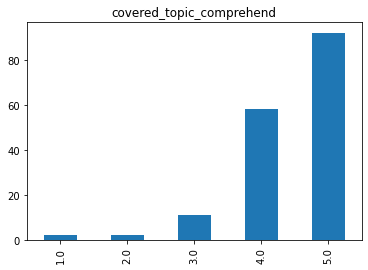

In [60]:
draw_barplot( 'covered_topic_comprehend', 'covered_topic_comprehend')

Max rating of understanding covered topic here is 5.0. Chart shows maximum students understood the covered topic.

In [61]:
#value counts for training rating
batch_info[ 'Training_rating'].value_counts()

5.0    109
4.0     44
3.0      6
2.0      3
1.0      3
Name: Training_rating, dtype: int64

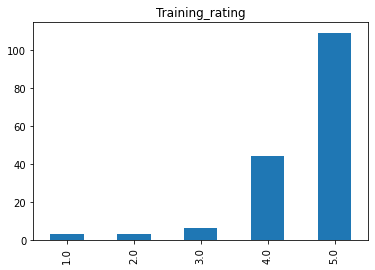

In [62]:
draw_barplot( 'Training_rating', 'Training_rating')

Most of the students rate this training as 5.0.So the training was a good program

In [63]:
# vaue counts for queries soution rating
batch_info[ 'Queries_solution'].value_counts()

5.0    115
4.0     40
3.0      5
2.0      3
1.0      2
Name: Queries_solution, dtype: int64

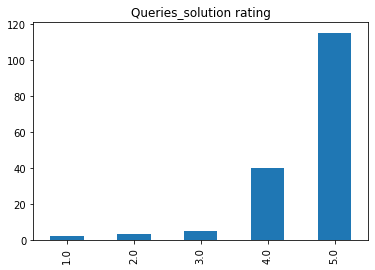

In [64]:
draw_barplot( 'Queries_solution','Queries_solution rating')

From visualization and also value_counts ,can see that queries solution ratings shows 5 which is presenting that the answering of the queries was understable,cear,good.Overall all three ratings shows the program was so much good.

### Do text classification and create a wordcloud visualization on the batch_information dataset’s suggestion row [ your suggestion for improving the training program]. [Extra mark: If possible do sentiment analysis and categorize the comments between 
good, bad and neutral] [from the batch information dataset]


In [65]:
batch_info[ 'Suggestion_for_improving_program'].unique()

array(['No', 'NO', 'All is well',
       'I want to know if you r going to tell us how to create app like shankha da present after session',
       'No suggestions.',
       'I just want to know that we can build our own app like shankha da present us after session on a dam project on a synthetic data set',
       'The free boot camp was really great. Whatever lessons on R was given was really helpful. Thank you',
       'This bootcamp was amazing, faculties are so friendly & well behaved, according to me there is no need of improving the training program,this was at its best ',
       'As per my suggestion, the way you guys are approaching is really good and I am quite sure you will carry on this quality of training in future. Al the best.',
       'Everything was smooth', 'So far its good.',
       'After all its a very great and very helpful session for me....Mainly as a friendly teaching process....Thanking you Surya Da(Rittik Da,Sankhadeep Da,Rishikesh Da)...',
       "It's very g

In [66]:
#text classification on suggestion row

In [67]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DCL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:
# crating variable for every suggestion

In [69]:
r1='No'
r2='There is literally no loopholes... its beyond perfect...thank you very much'
r3='Its the best....no more suggestions'
r4='It would be beneficial if people from similar backgrounds are put into the same batch during the training.'
r5='This is the best way of teaching programming that Ive ever seen.The way of teaching is so good that anyone can understand programming at ease. I feel fortunate enough to be a part of this training. I got no suggestions for improving the training programme because this is perfect!  '
r6='It is already a good process, no need for any changes. Excellent work.'
r7='all good....if the fees of the course was less it would have been best '
r8='The free boot camp was great. Whatever was taught in R was very helpful. Thank you'
r9='It was a great boot camp .'
r10='This bootcamp was amazing, faculties are so friendly & well behaved, according to me there is no need of improving the training program,this was at its best '
r11='As per my suggestion, the way you guys are approaching is really good and I am quite sure you will carry on this quality of training in future. Al the best.'
r12='So far its good.'
r13='After all its a very great and very helpful session for me....Mainly as a friendly teaching process....Thanking you Surya Da(Rittik Da,Sankhadeep Da,Rishikesh Da)...'
r14="It's very good, but I think if I had prior knowledge on coding then it would be more easy to understand"
r15='This is completely fine. I am benefitted. Doubts are easily cleared. '
r16='Boot camp was very informative... '
r17='Its a nice and friendly session'
r18='The free boot camp was great. Whatever was taught in R was very helpful. Thank you'
r19='Stat portion should be taught with more depth...'
r20='Nothing. This way of teaching is far more better than many other places. '
r21="No suggestion, in today's life no one gives a second from their life, but sir all of your team members are doing a great, i didn't have any knowledge about data science, but at least now i know about this a little, Thank you very much for the sessions. "
r22='It was a great boot camp .'
r12='It was a fun experience. Some well known topics were taught in an interesting manner. The details of basic stats, though necessary, was a bit tedious.'
r23='No suggestions, because the training is good and also good to learn new things. '
r24='It would be beneficial if people from similar backgrounds are put into the same batch during the training.'
r25='No queries.. It was a great session ..Softanbees free boot camp session provides a wonderful platform for enlightening the concepts of data analysis using R programming.. It shows how even coding can be so easy and fun to learn.'
r26="No suggestions...it's already the best"
r28="There is literally no loopholes... it's beyond perfect...thank you very much"
r29='If we could get to work on live projects that could help us understand concepts in detail ( in paid course )  as boot camp it was very good !!'
r30="It's my pleasure to give me a chance to learn that things.. "
r31="This is the best way of teaching programming that I've ever seen.The way of teaching is so good that anyone can understand programming at ease. I feel fortunate enough to be a part of this training. I got no suggestions for improving the training programme because this is perfect!"
r32='The way you & your team shown & presented the real-time project...That\'s great bro!   The reason for "maybe" is that at present  I\'m an intern (getting paid) & in starting unable to manage time. I\'ve the LinkedIn connection & contact no. of Mr. Surya... So, when I\'ll be comfortable with my office timing... I\'ll ping him & stepping towards DS...'
r33='If this program appears with at least one home assignment then it would help in better understanding. '
r34='Perfect way of explaining Nothing to change '
r35='Nothing.It really good.Carry on.'
r36='The session is awesome and pretty much interesting... Somehow I missed some session due to poor connectivity, I am going through with the Recordings. Times spent with these things are very much appreciated... Thank You.(Regards are there instead of suggestions)'
r37="It's really good...so for me there is nothing to improve more...thank you for the session"
r38="As this training programme is totally free , I can't deny it's better than I thought it would be. But I think having a score based practice exam and a dought clearing session will make it even better. I enjoyed the training programme and learned lots of technical aspects of data science which maes me really interested to be a data scientist in future. Not sure if I will be entering the full training programme right now as my parents are not ready to invest such amount of money at this situation, but surely I'm interested about doing the course in future."
r39='It was a very good journey with the training program,hope it will more better .. Thank you.'
r40="I don't think that, there is any need of improvisation of any thing. Rather, providing the session recording was very helpful to us. "
r41='This is excellent,no need to improve'
r42='Nothing.  It is  good enough '
r43="It's very helpful to me.. I have no suggestions at this time"
r44='It is already a good process, no need for any changes. Excellent work. '
r45='all good....if the fees of the course was less it would have been best'
r46='I liked it. Maybe better variations can be better. '
r47='It was good enough'
r48='Just one thing to say, "Love u guus" '
r49='No its quite good  personallu i dont think that any improvement is required'
r50="We learnt so much in this small amount of time... we can't ask more"
r51='Everything is perfect'
r52='The course can be a little longer. Focus on data visualization was a little too short. Maybe a day or more on it would be helpful'
r53='I thnik this is all anyone can do, its good.'
r54="Improving the accent can attract more avid learners from different parts of the world. As the teacher is from West Bengal, the enthusiasts from West parts of India like my friends whom I'd sent the link , they were not interested in doing this due to language problem. Kindly fix this so that people from all region could participate. Hindi and English should be the primary language . Thank you."
r55='The Some queries regarding the full time course structure and all.. '
r56='I had an amazing experience; no improvement needed'
r57='No this training program is really very interesting and  I want to join the paid course for learn about data science and R programming.  '
r58='I am satisfied with the way it is now. '
r59='I think it is completely ok. Very  Very interesting and informative sessions I ever have of this course. '
r60='Increase the workshop day..so that it covers up more topics. .'
r61='The training programme was quite good. '

In [70]:
# word tokenization for every variable of suggestion

In [71]:
r1_tokens=word_tokenize(r1)
print(r1_tokens)
r2_tokens=word_tokenize(r2)
print(r2_tokens)
r3_tokens=word_tokenize(r3)
print(r3_tokens)
r4_tokens=word_tokenize(r4)
print(r4_tokens)
r5_tokens=word_tokenize(r5)
print(r5_tokens)
r6_tokens=word_tokenize(r6)
print(r6_tokens)
r7_tokens=word_tokenize(r7)
print(r7_tokens)
r8_tokens=word_tokenize(r8)
print(r8_tokens)
r9_tokens=word_tokenize(r9)
print(r9_tokens)
r10_tokens=word_tokenize(r10)
print(r10_tokens)
r11_tokens=word_tokenize(r11)
print(r11_tokens)
r12_tokens=word_tokenize(r12)
print(r12_tokens)
r13_tokens=word_tokenize(r13)
print(r13_tokens)
r14_tokens=word_tokenize(r14)
print(r14_tokens)
r15_tokens=word_tokenize(r15)
print(r15_tokens)
r16_tokens=word_tokenize(r16)
print(r16_tokens)
r17_tokens=word_tokenize(r17)
print(r17_tokens)
r18_tokens=word_tokenize(r18)
print(r18_tokens)
r19_tokens=word_tokenize(r19)
print(r19_tokens)
r20_tokens=word_tokenize(r20)
print(r20_tokens)
r21_tokens=word_tokenize(r21)
print(r21_tokens)
r22_tokens=word_tokenize(r22)
print(r22_tokens)
r23_tokens=word_tokenize(r23)
print(r23_tokens)
r24_tokens=word_tokenize(r24)
print(r24_tokens)
r25_tokens=word_tokenize(r25)
print(r25_tokens)
r26_tokens=word_tokenize(r26)
print(r26_tokens)
r28_tokens=word_tokenize(r28)
print(r28_tokens)
r29_tokens=word_tokenize(r29)
print(r29_tokens)
r30_tokens=word_tokenize(r30)
print(r30_tokens)
r31_tokens=word_tokenize(r31)
print(r31_tokens)
r32_tokens=word_tokenize(r32)
print(r32_tokens)
r33_tokens=word_tokenize(r33)
print(r33_tokens)
r34_tokens=word_tokenize(r34)
print(r34_tokens)
r35_tokens=word_tokenize(r35)
print(r35_tokens)
r36_tokens=word_tokenize(r36)
print(r36_tokens)
r37_tokens=word_tokenize(r37)
print(r37_tokens)
r38_tokens=word_tokenize(r38)
print(r38_tokens)
r39_tokens=word_tokenize(r39)
print(r39_tokens)
r40_tokens=word_tokenize(r40)
print(r40_tokens)
r41_tokens=word_tokenize(r41)
print(r41_tokens)
r42_tokens=word_tokenize(r42)
print(r42_tokens)
r43_tokens=word_tokenize(r43)
print(r43_tokens)
r44_tokens=word_tokenize(r44)
print(r44_tokens)
r45_tokens=word_tokenize(r45)
print(r45_tokens)
r46_tokens=word_tokenize(r46)
print(r46_tokens)
r47_tokens=word_tokenize(r47)
print(r47_tokens)
r48_tokens=word_tokenize(r48)
print(r48_tokens)
r49_tokens=word_tokenize(r49)
print(r49_tokens)
r50_tokens=word_tokenize(r50)
print(r50_tokens)
r51_tokens=word_tokenize(r51)
print(r51_tokens)
r52_tokens=word_tokenize(r52)
print(r52_tokens)
r53_tokens=word_tokenize(r53)
print(r53_tokens)
r54_tokens=word_tokenize(r54)
print(r54_tokens)
r55_tokens=word_tokenize(r55)
print(r55_tokens)
r56_tokens=word_tokenize(r56)
print(r56_tokens)
r57_tokens=word_tokenize(r57)
print(r57_tokens)
r58_tokens=word_tokenize(r58)
print(r58_tokens)
r59_tokens=word_tokenize(r59)
print(r59_tokens)
r60_tokens=word_tokenize(r60)
print(r60_tokens)
r61_tokens=word_tokenize(r61)
print(r61_tokens)

['No']
['There', 'is', 'literally', 'no', 'loopholes', '...', 'its', 'beyond', 'perfect', '...', 'thank', 'you', 'very', 'much']
['Its', 'the', 'best', '....', 'no', 'more', 'suggestions']
['It', 'would', 'be', 'beneficial', 'if', 'people', 'from', 'similar', 'backgrounds', 'are', 'put', 'into', 'the', 'same', 'batch', 'during', 'the', 'training', '.']
['This', 'is', 'the', 'best', 'way', 'of', 'teaching', 'programming', 'that', 'Ive', 'ever', 'seen.The', 'way', 'of', 'teaching', 'is', 'so', 'good', 'that', 'anyone', 'can', 'understand', 'programming', 'at', 'ease', '.', 'I', 'feel', 'fortunate', 'enough', 'to', 'be', 'a', 'part', 'of', 'this', 'training', '.', 'I', 'got', 'no', 'suggestions', 'for', 'improving', 'the', 'training', 'programme', 'because', 'this', 'is', 'perfect', '!']
['It', 'is', 'already', 'a', 'good', 'process', ',', 'no', 'need', 'for', 'any', 'changes', '.', 'Excellent', 'work', '.']
['all', 'good', '....', 'if', 'the', 'fees', 'of', 'the', 'course', 'was', 'less'

In [72]:
#union all token of suggestion variable

In [73]:
review_tokens=(set(r1_tokens).union(set(r2_tokens)).union(set(r3_tokens)).union(set(r4_tokens)).union(set(r5_tokens)).union(set(r6_tokens)).
               union(set(r7_tokens)).union(set(r8_tokens)).union(set(r9_tokens)).union(set(r9_tokens)).union(set(r10_tokens)).union(set(r11_tokens)).
               union(set(r12_tokens)).union(set(r14_tokens)).union(set(r15_tokens)).union(set(r16_tokens)).union(set(r17_tokens)).union(set(r18_tokens)).
               union(set(r19_tokens)).union(set(r20_tokens)).union(set(r21_tokens)).union(set(r22_tokens)).union(set(r23_tokens)).
              union(set(r24_tokens)).union(set(r25_tokens)).union(set(r26_tokens)).union(set(r28_tokens)).union(set(r29_tokens)).
              union(set(r30_tokens)).union(set(r31_tokens)).union(set(r32_tokens)).union(set(r33_tokens)).union(set(r34_tokens)).
              union(set(r35_tokens)).union(set(r36_tokens)).union(set(r37_tokens)).union(set(r38_tokens)).union(set(r39_tokens)).
              union(set(r40_tokens)).union(set(r41_tokens)).union(set(r42_tokens)).union(set(r43_tokens)).union(set(r44_tokens)).
              union(set(r45_tokens)).union(set(r46_tokens)).union(set(r47_tokens)).union(set(r48_tokens)).union(set(r49_tokens)).
              union(set(r50_tokens)).union(set(r51_tokens)).union(set(r52_tokens)).union(set(r53_tokens)).union(set(r54_tokens)).
              union(set(r55_tokens)).union(set(r56_tokens)).union(set(r57_tokens)).union(set(r58_tokens)).union(set(r59_tokens)).
              union(set(r60_tokens)).union(set(r61_tokens)))
print(review_tokens)             

{'a', 'then', 'doing', 'learners', '``', '...', 'sir', 'invest', 'West', ',', 'though', 'me', 'Some', 'no', 'knowledge', 'loopholes', 'sent', 'dont', "'s", 'benefitted', 'work', 'approaching', 'second', 'connection', 'present', 'sure', 'know', 'these', 'many', "'ve", 'learn', 'You', 'coding', '(', ')', 'enough', 'was', 'pleasure', 'free', 'ca', 'things', 'day', '!', 'fortunate', 'are', 'teaching', 'interesting', 'nothing', 'ask', 'we', 'good', 'stats', 'personallu', 'spent', 'backgrounds', 'it', 'situation', 'unable', 'paid', 'now', 'nice', 'surely', 'like', 'course', 'members', 'that', 'scientist', 'enlightening', 'real-time', 'same', 'faculties', 'That', 'were', 'learned', 'or', '&', 'far', 'how', 'there', 'manage', 'really', 'more', 'pretty', 'future', 'other', 'satisfied', 'There', 'shown', 'dought', 'give', 'topics', 'appreciated', 'well', 'Its', 'Softanbees', 'Bengal', 'through', 'guys', "n't", 'way', 'programme', 'practice', 'getting', 'their', 'Times', 'lots', 'informative', 'c

In [74]:
len(review_tokens)

399

In [75]:
review_tokens

{'!',
 '&',
 "''",
 "'d",
 "'ll",
 "'m",
 "'s",
 "'ve",
 '(',
 ')',
 ',',
 '.',
 '..',
 '...',
 '....',
 ';',
 'Al',
 'As',
 'Bengal',
 'Boot',
 'But',
 'DS',
 'Doubts',
 'English',
 'Everything',
 'Excellent',
 'Focus',
 'Hindi',
 'I',
 'If',
 'Improving',
 'Increase',
 'India',
 'It',
 'Its',
 'Ive',
 'Just',
 'Kindly',
 'LinkedIn',
 'Love',
 'Maybe',
 'Mr.',
 'No',
 'Not',
 'Nothing',
 'Nothing.It',
 'Perfect',
 'R',
 'Rather',
 'Recordings',
 'Regards',
 'So',
 'Softanbees',
 'Some',
 'Somehow',
 'Stat',
 'Surya',
 'Thank',
 'That',
 'The',
 'There',
 'This',
 'Times',
 'Very',
 'We',
 'West',
 'Whatever',
 'You',
 '``',
 'a',
 'about',
 'accent',
 'according',
 'all',
 'already',
 'also',
 'am',
 'amazing',
 'amount',
 'an',
 'analysis',
 'and',
 'any',
 'anyone',
 'appears',
 'appreciated',
 'approaching',
 'are',
 'as',
 'ask',
 'aspects',
 'assignment',
 'at',
 'attract',
 'avid',
 'awesome',
 'backgrounds',
 'based',
 'basic',
 'batch',
 'be',
 'because',
 'been',
 'behaved',


In [76]:
#create dictatory fie for al token variable

In [77]:
r1_dict=dict.fromkeys(review_tokens,0)
r2_dict=dict.fromkeys(review_tokens,0)
r3_dict=dict.fromkeys(review_tokens,0)
r4_dict=dict.fromkeys(review_tokens,0)
r5_dict=dict.fromkeys(review_tokens,0)
r6_dict=dict.fromkeys(review_tokens,0)
r7_dict=dict.fromkeys(review_tokens,0)
r8_dict=dict.fromkeys(review_tokens,0)
r9_dict=dict.fromkeys(review_tokens,0)
r10_dict=dict.fromkeys(review_tokens,0)
r11_dict=dict.fromkeys(review_tokens,0)
r12_dict=dict.fromkeys(review_tokens,0)
r13_dict=dict.fromkeys(review_tokens,0)
r14_dict=dict.fromkeys(review_tokens,0)
r15_dict=dict.fromkeys(review_tokens,0)
r16_dict=dict.fromkeys(review_tokens,0)
r17_dict=dict.fromkeys(review_tokens,0)
r18_dict=dict.fromkeys(review_tokens,0)
r19_dict=dict.fromkeys(review_tokens,0)
r20_dict=dict.fromkeys(review_tokens,0)
r21_dict=dict.fromkeys(review_tokens,0)
r22_dict=dict.fromkeys(review_tokens,0)
r23_dict=dict.fromkeys(review_tokens,0)
r24_dict=dict.fromkeys(review_tokens,0)
r25_dict=dict.fromkeys(review_tokens,0)
r26_dict=dict.fromkeys(review_tokens,0)
r28_dict=dict.fromkeys(review_tokens,0)
r29_dict=dict.fromkeys(review_tokens,0)
r30_dict=dict.fromkeys(review_tokens,0)
r31_dict=dict.fromkeys(review_tokens,0)
r32_dict=dict.fromkeys(review_tokens,0)
r33_dict=dict.fromkeys(review_tokens,0)
r34_dict=dict.fromkeys(review_tokens,0)
r35_dict=dict.fromkeys(review_tokens,0)
r36_dict=dict.fromkeys(review_tokens,0)
r37_dict=dict.fromkeys(review_tokens,0)
r38_dict=dict.fromkeys(review_tokens,0)
r39_dict=dict.fromkeys(review_tokens,0)
r40_dict=dict.fromkeys(review_tokens,0)
r41_dict=dict.fromkeys(review_tokens,0)
r42_dict=dict.fromkeys(review_tokens,0)
r43_dict=dict.fromkeys(review_tokens,0)
r44_dict=dict.fromkeys(review_tokens,0)
r45_dict=dict.fromkeys(review_tokens,0)
r46_dict=dict.fromkeys(review_tokens,0)
r47_dict=dict.fromkeys(review_tokens,0)
r48_dict=dict.fromkeys(review_tokens,0)
r49_dict=dict.fromkeys(review_tokens,0)
r50_dict=dict.fromkeys(review_tokens,0)
r51_dict=dict.fromkeys(review_tokens,0)
r52_dict=dict.fromkeys(review_tokens,0)
r53_dict=dict.fromkeys(review_tokens,0)
r54_dict=dict.fromkeys(review_tokens,0)
r55_dict=dict.fromkeys(review_tokens,0)
r56_dict=dict.fromkeys(review_tokens,0)
r57_dict=dict.fromkeys(review_tokens,0)
r58_dict=dict.fromkeys(review_tokens,0)
r59_dict=dict.fromkeys(review_tokens,0)
r60_dict=dict.fromkeys(review_tokens,0)
r61_dict=dict.fromkeys(review_tokens,0)

In [78]:
r1_dict

{'a': 0,
 'then': 0,
 'doing': 0,
 'learners': 0,
 '``': 0,
 '...': 0,
 'sir': 0,
 'invest': 0,
 'West': 0,
 ',': 0,
 'though': 0,
 'me': 0,
 'Some': 0,
 'no': 0,
 'knowledge': 0,
 'loopholes': 0,
 'sent': 0,
 'dont': 0,
 "'s": 0,
 'benefitted': 0,
 'work': 0,
 'approaching': 0,
 'second': 0,
 'connection': 0,
 'present': 0,
 'sure': 0,
 'know': 0,
 'these': 0,
 'many': 0,
 "'ve": 0,
 'learn': 0,
 'You': 0,
 'coding': 0,
 '(': 0,
 ')': 0,
 'enough': 0,
 'was': 0,
 'pleasure': 0,
 'free': 0,
 'ca': 0,
 'things': 0,
 'day': 0,
 '!': 0,
 'fortunate': 0,
 'are': 0,
 'teaching': 0,
 'interesting': 0,
 'nothing': 0,
 'ask': 0,
 'we': 0,
 'good': 0,
 'stats': 0,
 'personallu': 0,
 'spent': 0,
 'backgrounds': 0,
 'it': 0,
 'situation': 0,
 'unable': 0,
 'paid': 0,
 'now': 0,
 'nice': 0,
 'surely': 0,
 'like': 0,
 'course': 0,
 'members': 0,
 'that': 0,
 'scientist': 0,
 'enlightening': 0,
 'real-time': 0,
 'same': 0,
 'faculties': 0,
 'That': 0,
 'were': 0,
 'learned': 0,
 'or': 0,
 '&': 0,
 '

In [79]:
for token in r1_tokens:
    r1_dict[token]+=1
for token in r2_tokens:
    r2_dict[token]+=1
for token in r3_tokens:
    r3_dict[token]+=1
for token in r4_tokens:
    r4_dict[token]+=1
for token in r5_tokens:
    r5_dict[token]+=1
for token in r6_tokens:
    r6_dict[token]+=1
for token in r7_tokens:
    r7_dict[token]+=1
for token in r8_tokens:
    r8_dict[token]+=1
for token in r9_tokens:
    r9_dict[token]+=1
for token in r10_tokens:
    r10_dict[token]+=1
for token in r11_tokens:
    r11_dict[token]+=1
for token in r12_tokens:
    r12_dict[token]+=1
for token in r14_tokens:
    r14_dict[token]+=1
for token in r15_tokens:
    r15_dict[token]+=1
for token in r16_tokens:
    r16_dict[token]+=1
for token in r17_tokens:
    r17_dict[token]+=1
for token in r18_tokens:
    r18_dict[token]+=1
for token in r19_tokens:
    r19_dict[token]+=1
for token in r20_tokens:
    r20_dict[token]+=1
for token in r21_tokens:
    r21_dict[token]+=1
for token in r22_tokens:
    r22_dict[token]+=1
for token in r23_tokens:
    r23_dict[token]+=1
for token in r24_tokens:
    r24_dict[token]+=1
for token in r25_tokens:
    r25_dict[token]+=1
for token in r26_tokens:
    r26_dict[token]+=1
for token in r28_tokens:
    r28_dict[token]+=1
for token in r29_tokens:
    r29_dict[token]+=1
for token in r30_tokens:
    r30_dict[token]+=1
for token in r31_tokens:
    r31_dict[token]+=1
for token in r32_tokens:
    r32_dict[token]+=1
for token in r33_tokens:
    r33_dict[token]+=1
for token in r34_tokens:
    r34_dict[token]+=1
for token in r35_tokens:
    r35_dict[token]+=1
for token in r36_tokens:
    r36_dict[token]+=1
for token in r37_tokens:
    r37_dict[token]+=1
for token in r38_tokens:
    r38_dict[token]+=1
for token in r39_tokens:
    r39_dict[token]+=1
for token in r40_tokens:
    r40_dict[token]+=1
for token in r41_tokens:
    r41_dict[token]+=1
for token in r42_tokens:
    r42_dict[token]+=1
for token in r43_tokens:
    r43_dict[token]+=1
for token in r44_tokens:
    r44_dict[token]+=1
for token in r45_tokens:
    r45_dict[token]+=1
for token in r46_tokens:
    r46_dict[token]+=1
for token in r47_tokens:
    r47_dict[token]+=1
for token in r48_tokens:
    r48_dict[token]+=1
for token in r49_tokens:
    r49_dict[token]+=1
for token in r50_tokens:
    r50_dict[token]+=1
for token in r51_tokens:
    r51_dict[token]+=1
for token in r52_tokens:
    r52_dict[token]+=1
for token in r53_tokens:
    r53_dict[token]+=1
for token in r54_tokens:
    r54_dict[token]+=1
for token in r55_tokens:
    r55_dict[token]+=1
for token in r56_tokens:
    r56_dict[token]+=1
for token in r57_tokens:
    r57_dict[token]+=1
for token in r58_tokens:
    r58_dict[token]+=1
for token in r59_tokens:
    r59_dict[token]+=1
for token in r60_tokens:
    r60_dict[token]+=1
for token in r61_tokens:
    r61_dict[token]+=1

In [80]:
r12_dict

{'a': 2,
 'then': 0,
 'doing': 0,
 'learners': 0,
 '``': 0,
 '...': 0,
 'sir': 0,
 'invest': 0,
 'West': 0,
 ',': 2,
 'though': 1,
 'me': 0,
 'Some': 1,
 'no': 0,
 'knowledge': 0,
 'loopholes': 0,
 'sent': 0,
 'dont': 0,
 "'s": 0,
 'benefitted': 0,
 'work': 0,
 'approaching': 0,
 'second': 0,
 'connection': 0,
 'present': 0,
 'sure': 0,
 'know': 0,
 'these': 0,
 'many': 0,
 "'ve": 0,
 'learn': 0,
 'You': 0,
 'coding': 0,
 '(': 0,
 ')': 0,
 'enough': 0,
 'was': 2,
 'pleasure': 0,
 'free': 0,
 'ca': 0,
 'things': 0,
 'day': 0,
 '!': 0,
 'fortunate': 0,
 'are': 0,
 'teaching': 0,
 'interesting': 1,
 'nothing': 0,
 'ask': 0,
 'we': 0,
 'good': 0,
 'stats': 1,
 'personallu': 0,
 'spent': 0,
 'backgrounds': 0,
 'it': 0,
 'situation': 0,
 'unable': 0,
 'paid': 0,
 'now': 0,
 'nice': 0,
 'surely': 0,
 'like': 0,
 'course': 0,
 'members': 0,
 'that': 0,
 'scientist': 0,
 'enlightening': 0,
 'real-time': 0,
 'same': 0,
 'faculties': 0,
 'That': 0,
 'were': 1,
 'learned': 0,
 'or': 0,
 '&': 0,
 '

In [81]:
# create dataframe for all dict file

In [82]:
reviews_dict_df=pd.DataFrame([r1_dict,r2_dict,r3_dict,r4_dict,r5_dict,r6_dict,r7_dict,r8_dict,r9_dict,r10_dict,
                             r11_dict,r12_dict,r14_dict,r15_dict,r16_dict,r17_dict,r18_dict,r19_dict,r20_dict,r21_dict,
                             r22_dict,r23_dict,r24_dict,r25_dict,r25_dict,r28_dict,r29_dict,r30_dict,r31_dict,
                             r32_dict,r33_dict,r34_dict,r35_dict,r36_dict,r37_dict,r38_dict,r39_dict,r40_dict,r41_dict,
                             r42_dict,r43_dict,r44_dict,r45_dict,r46_dict,r47_dict,r48_dict,r49_dict,r50_dict,r51_dict,
                             r52_dict,r53_dict,r54_dict,r55_dict,r56_dict,r57_dict,r58_dict,r59_dict,r60_dict,r61_dict])

In [83]:
reviews_dict_df.head(10)

,a,then,doing,learners,``,...,sir,invest,West,",",...,due,covers,parents,maes,detail,some,do,any,at,bit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0


In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
review_list=[r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r28,r29,r30,
            r31,r32,r33,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52,r53,r54,r55,r56,r57,r58
             ,r59,r60,r61]
review_list

['No',
 'There is literally no loopholes... its beyond perfect...thank you very much',
 'Its the best....no more suggestions',
 'It would be beneficial if people from similar backgrounds are put into the same batch during the training.',
 'This is the best way of teaching programming that Ive ever seen.The way of teaching is so good that anyone can understand programming at ease. I feel fortunate enough to be a part of this training. I got no suggestions for improving the training programme because this is perfect!  ',
 'It is already a good process, no need for any changes. Excellent work.',
 'all good....if the fees of the course was less it would have been best ',
 'The free boot camp was great. Whatever was taught in R was very helpful. Thank you',
 'It was a great boot camp .',
 'This bootcamp was amazing, faculties are so friendly & well behaved, according to me there is no need of improving the training program,this was at its best ',
 'As per my suggestion, the way you guys are

In [86]:
count_vect=CountVectorizer()

In [87]:
x_counts=count_vect.fit_transform(review_list)

In [88]:
type(x_counts)

scipy.sparse.csr.csr_matrix

In [89]:
x_names=count_vect.get_feature_names()
x_names

['about',
 'accent',
 'according',
 'al',
 'all',
 'already',
 'also',
 'am',
 'amazing',
 'amount',
 'an',
 'analysis',
 'and',
 'any',
 'anyone',
 'appears',
 'appreciated',
 'approaching',
 'are',
 'as',
 'ask',
 'aspects',
 'assignment',
 'at',
 'attract',
 'avid',
 'awesome',
 'backgrounds',
 'based',
 'basic',
 'batch',
 'be',
 'because',
 'been',
 'behaved',
 'beneficial',
 'benefitted',
 'bengal',
 'best',
 'better',
 'beyond',
 'bit',
 'boot',
 'bootcamp',
 'bro',
 'but',
 'camp',
 'can',
 'carry',
 'chance',
 'change',
 'changes',
 'cleared',
 'clearing',
 'coding',
 'comfortable',
 'completely',
 'concepts',
 'connection',
 'connectivity',
 'contact',
 'could',
 'course',
 'covers',
 'data',
 'day',
 'deny',
 'depth',
 'detail',
 'details',
 'didn',
 'different',
 'do',
 'doing',
 'don',
 'dont',
 'doubts',
 'dought',
 'ds',
 'due',
 'during',
 'ease',
 'easily',
 'easy',
 'english',
 'enjoyed',
 'enlightening',
 'enough',
 'entering',
 'enthusiasts',
 'even',
 'ever',
 'eve

In [90]:
a=pd.DataFrame(x_counts.toarray(),columns=x_names)

In [91]:
a.head(2)

,about,accent,according,al,all,already,also,am,amazing,amount,...,whom,will,with,wonderful,work,workshop,world,would,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
tf_vect=TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')

In [94]:
tf_matrix=tf_vect.fit_transform(review_list)

In [95]:
type(tf_matrix)

scipy.sparse.csr.csr_matrix

In [96]:
tf_matrix.shape

(59, 254)

In [97]:
tf_names=tf_vect.get_feature_names()

In [98]:
tf_names

['accent',
 'according',
 'al',
 'amazing',
 'analysis',
 'appears',
 'appreciated',
 'approaching',
 'ask',
 'aspects',
 'assignment',
 'attract',
 'avid',
 'awesome',
 'backgrounds',
 'based',
 'basic',
 'batch',
 'behaved',
 'beneficial',
 'benefitted',
 'bengal',
 'best',
 'better',
 'bit',
 'boot',
 'bootcamp',
 'bro',
 'camp',
 'carry',
 'chance',
 'change',
 'changes',
 'cleared',
 'clearing',
 'coding',
 'comfortable',
 'completely',
 'concepts',
 'connection',
 'connectivity',
 'contact',
 'course',
 'covers',
 'data',
 'day',
 'deny',
 'depth',
 'details',
 'didn',
 'different',
 'doing',
 'don',
 'dont',
 'doubts',
 'dought',
 'ds',
 'ease',
 'easily',
 'easy',
 'english',
 'enjoyed',
 'enlightening',
 'entering',
 'enthusiasts',
 'exam',
 'excellent',
 'experience',
 'explaining',
 'faculties',
 'far',
 'feel',
 'fees',
 'fine',
 'fix',
 'focus',
 'fortunate',
 'free',
 'friendly',
 'friends',
 'fun',
 'future',
 'getting',
 'gives',
 'going',
 'good',
 'got',
 'great',
 'g

In [99]:
suggestion_df=pd.DataFrame(tf_matrix.toarray(),columns=tf_names)

In [100]:
suggestion_df.head(10)

,accent,according,al,amazing,analysis,appears,appreciated,approaching,ask,aspects,...,variations,ve,visualization,want,way,west,wonderful,work,workshop,world
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.32953,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.428282,0.0,0.0
6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.348149,0.0,0.316076,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0


In [101]:
# Sentiment Anaysis of suggestion row

In [102]:
from textblob import TextBlob
import re

In [103]:
su1=batch_info[ 'Suggestion_for_improving_program']

In [104]:
df=pd.DataFrame(su1)

In [105]:
df

,Suggestion_for_improving_program
0,No
1,NO
2,No
3,All is well
4,I want to know if you r going to tell us how t...
...,...
160,No
161,No
162,The training programme was quite good.
163,No


In [106]:
#create function to get polarity,subjectivity of text
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['subjectivity']=df[ 'Suggestion_for_improving_program'].apply(getSubjectivity)
df['polarity']=df[ 'Suggestion_for_improving_program'].apply(getPolarity)


In [107]:
df

,Suggestion_for_improving_program,subjectivity,polarity
0,No,0.0,0.0
1,NO,0.0,0.0
2,No,0.0,0.0
3,All is well,0.0,0.0
4,I want to know if you r going to tell us how t...,0.0,0.0
...,...,...,...
160,No,0.0,0.0
161,No,0.0,0.0
162,The training programme was quite good.,0.6,0.7
163,No,0.0,0.0


In [108]:
# categorize text(good,bad,neutral) based on polarity
def getAnalysis(score):
    if(score)<0:
        return 'bad'
    elif (score==0):
        return 'neutral'
    else:
        return 'good'
df['Analysis']=df['polarity'].apply(getAnalysis)

In [109]:
df

,Suggestion_for_improving_program,subjectivity,polarity,Analysis
0,No,0.0,0.0,neutral
1,NO,0.0,0.0,neutral
2,No,0.0,0.0,neutral
3,All is well,0.0,0.0,neutral
4,I want to know if you r going to tell us how t...,0.0,0.0,neutral
...,...,...,...,...
160,No,0.0,0.0,neutral
161,No,0.0,0.0,neutral
162,The training programme was quite good.,0.6,0.7,good
163,No,0.0,0.0,neutral


In [110]:
#view all good suggestion 
j=1
sortedDF=df.sort_values(by=['polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='good'):
        print(str(j)+ ') '+sortedDF[ 'Suggestion_for_improving_program'][i])
        print()
        j=j+1
    

1) I just want to know that we can build our own app like shankha da present us after session on a dam project on a synthetic data set

2) The free boot camp was really great. Whatever lessons on R was given was really helpful. Thank you

3) This bootcamp was amazing, faculties are so friendly & well behaved, according to me there is no need of improving the training program,this was at its best 

4) As per my suggestion, the way you guys are approaching is really good and I am quite sure you will carry on this quality of training in future. Al the best.

5) Everything was smooth

6) So far its good.

7) After all its a very great and very helpful session for me....Mainly as a friendly teaching process....Thanking you Surya Da(Rittik Da,Sankhadeep Da,Rishikesh Da)...

8) It's very good, but I think if I had prior knowledge on coding then it would be more easy to understand

9) This is completely fine. I am benefitted. Doubts are easily cleared. 

10) Boot camp was very informative... 


In [111]:
# view all neutral suggestion
j=1
sortedDF=df.sort_values(by=['polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='neutral'):
        print(str(j)+ ') '+sortedDF[ 'Suggestion_for_improving_program'][i])
        print()
        j=j+1

1) No

2) NO

3) No

4) All is well

5) I want to know if you r going to tell us how to create app like shankha da present after session

6) No

7) No suggestions.

8) No

9) No

10) No

11) No

12) No

13) No

14) No

15) No

16) It would be beneficial if people from similar backgrounds are put into the same batch during the training.

17) No

18) No

19) No

20) No

21) No

22) No

23) No

24) No suggestions...it's already the best👍

25) No

26) It's my pleasure to give me a chance to learn that things.. 

27) No

28) No

29) No

30) No

31) No

32) No

33) No

34) No suggestion... 

35) No

36) No

37) No

38) No

39) No

40) No

41) No

42) No

43) No

44) No

45) No

46) No

47) No

48) Nothing

49) No

50) No

51) Keep Going

52) This is excellent,no need to improve

53) No

54) No

55) No

56) No

57) No

58) No

59) No

60) No

61) No

62) No

63) No

64) No

65) No

66) No

67) No

68) No

69) No

70) No

71) No

72) No

73) No

74) No

75) No

76) No

77) No

78) No

79) No



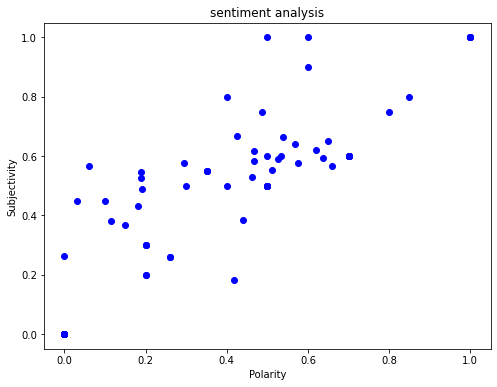

In [112]:
#scatter plot for poarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i], df['subjectivity'][i],color='blue')
plt.title('sentiment analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [113]:
#parcentage of good suggestion
good_suggestion=df[df.Analysis=='good']
good_suggestion=good_suggestion[ 'Suggestion_for_improving_program']

round( (good_suggestion.shape[0]/df.shape[0])*100,1)

37.0

In [114]:
#parcentage of bad suggestion
bad_suggestion=df[df.Analysis=='bad']
bad_suggestion=bad_suggestion[ 'Suggestion_for_improving_program']

round( (bad_suggestion.shape[0]/df.shape[0])*100,1)

0.0

In [115]:
#parcentage of neutral suggestion
neutral_suggestion=df[df.Analysis=='neutral']
neutral_suggestion=neutral_suggestion[ 'Suggestion_for_improving_program']

round( (neutral_suggestion.shape[0]/df.shape[0])*100,1)

63.0

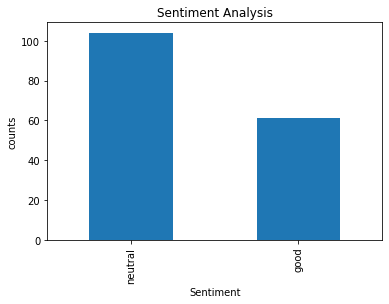

In [116]:
df['Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

Sentiment Analysis of suggestion row shows there has no bad reviews,37% are good reviews and rest of them neutral reviews.So
from analysis,It can be said that Program was quite good.and It will be better day after day.

### Find out how many people are interested in applying for the paid internship and also find if there any correlation between their positive reply in applying for internship and course quality [ use how well they understand the topics column for course quality]

In [117]:
batch_info.columns

Index([' Time', 'Email Address', 'Name', 'covered_topic_comprehend',
       'Training_rating', 'Queries_solution', 'Interest_to_join_fullcourse',
       'Course_recommendation_To_others', 'Apply_for_paid_internship',
       'Suggestion_for_improving_program'],
      dtype='object')

In [118]:
batch_info[ 'Apply_for_paid_internship'].value_counts()

Maybe    83
Yes      41
No       40
qt        1
Name: Apply_for_paid_internship, dtype: int64

In [119]:
#Subsetting 'Apply_for_paid_internship' and group by with 'covered_topic_comprehend' for finding correlation between them.
corr=batch_info.dropna(subset=[ 'Apply_for_paid_internship'])
corr1=batch_info.groupby([ 'Apply_for_paid_internship', 'covered_topic_comprehend'])[ 'Apply_for_paid_internship'].agg('count')
corr2=pd.DataFrame(corr1)
corr2.rename(columns={ 'Apply_for_paid_internship':"counts"},inplace=True)
corr2.reset_index(inplace=True)
corr2.sort_values("counts",ascending=False)

,Apply_for_paid_internship,covered_topic_comprehend,counts
4,Maybe,5.0,43
3,Maybe,4.0,34
8,No,5.0,24
12,Yes,5.0,24
11,Yes,4.0,14
7,No,4.0,10
6,No,3.0,5
2,Maybe,3.0,4
10,Yes,3.0,2
0,Maybe,1.0,1


In [120]:
#find correlation and describe the output.
def corr_plot(df, size = (12, 10), top = None) :
    
    corrmat = df.corr()

    if top == None :    
        f, ax = plt.subplots(figsize = size)
        sns.heatmap(corrmat, annot = True, fmt = '.2f') # fmt = Decimal rounds
    else :
        cor_cols = corrmat.nlargest(top, 'Apply_for_paid_internship')[ 'covered_topic_comprehend'].index
        corrmat = np.corrcoef(df[cor_cols].values.T)
        f, ax = plt.subplots(figsize = size)
        sns.heatmap(corrmat, annot = True, fmt = '.2f', 
                    yticklabels = cor_cols.values, xticklabels = cor_cols.values)

In [121]:
#The statistical relationship between two variables is referred to as their correlation.
#Here we are presenting the correlation between 'Apply_for_paid_internship' and 'covered_topic_comprehend'

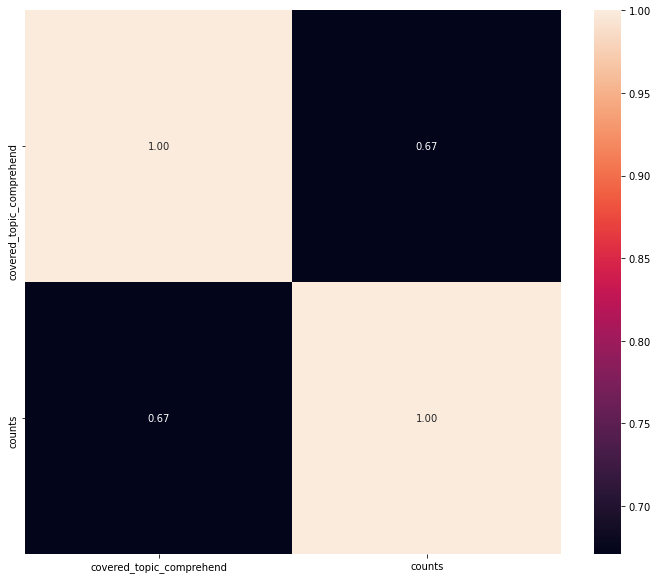

In [122]:
corr_plot(corr2)

##### Correlation value for both columns change in same direction.We know that,if there has any same direction between two columns in Correlation it will be a positive correlation.So, the correlation between 'Apply_for_paid_internship' and  'covered_topic_comprehend' is a positive correlation.

Text(0.5, 1.0, 'Correlation heatmap')

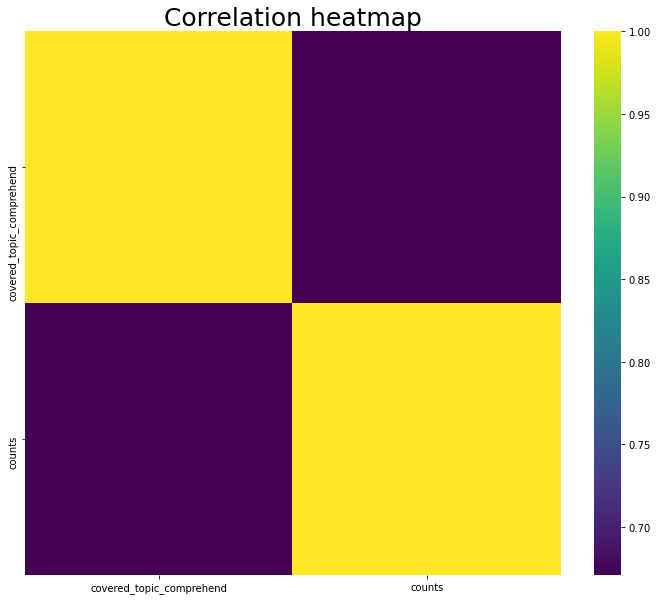

In [123]:
plt.figure(figsize = (12,10))
sns.heatmap(corr2.corr(), cmap = 'viridis')
plt.title('Correlation heatmap',size = 25)

Here's the correlation heatmap of avobe Correlation value